# **Blurring and Smoothing Images**

- Often blurring and smoothing is combined with edge detection
- Edge detection algorithms detect too many edges when shown a high resolution image without blurring

## Methods explored

### Gamma Correction 
- Gamma correction can be applied to an image to make it appear brigher or darker depending on the Gamma value chosen. 

### Kernel based filters
- source : http://setosa.io/ev/image-kernels/

In [71]:
import cv2 as cv

import numpy as np

import matplotlib.pyplot as plt

In [72]:
# Function for loading image

def load_img():
    img = cv.imread('../DATA/bricks.jpg').astype(np.float32) / 255
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

# Function for displaying image

def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)


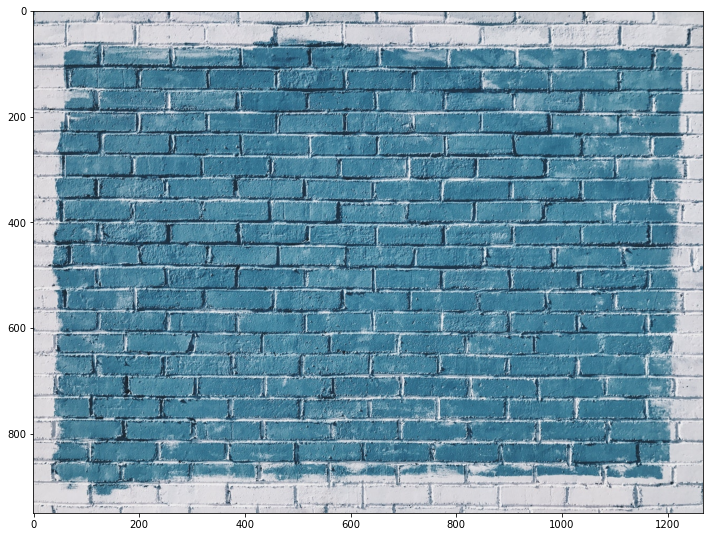

In [73]:
img = load_img()
display_img(img)

## Gamma Correction

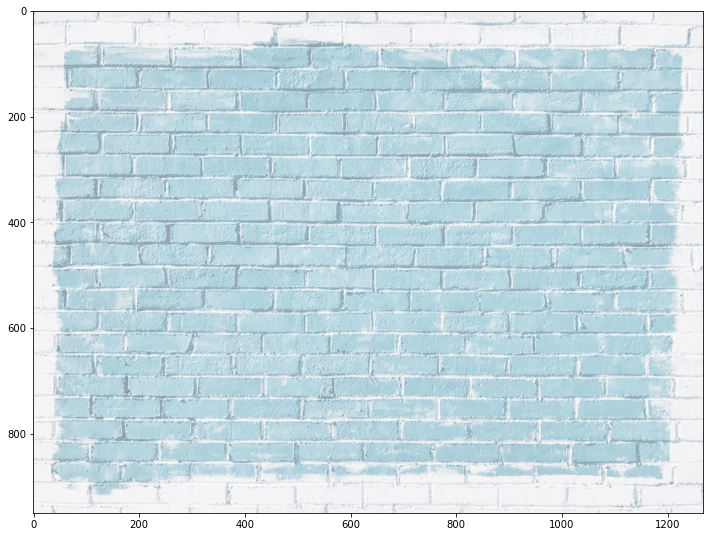

In [74]:
gamma = 1/4 # smaller values = brighter, bigger values = darker
result = np.power(img, gamma)
display_img(result)

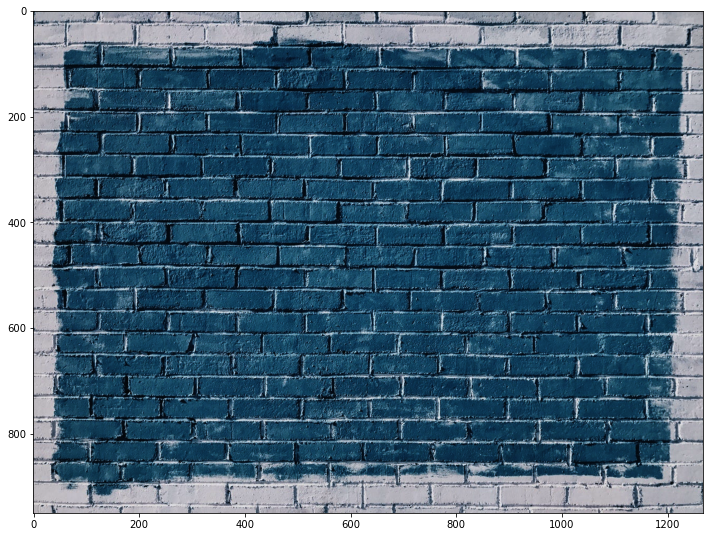

In [75]:
gamma = 2 # smaller values = brighter, bigger values = darker
result = np.power(img, gamma)
display_img(result)

## Blurring

1. using low pass filter using 2D convolution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


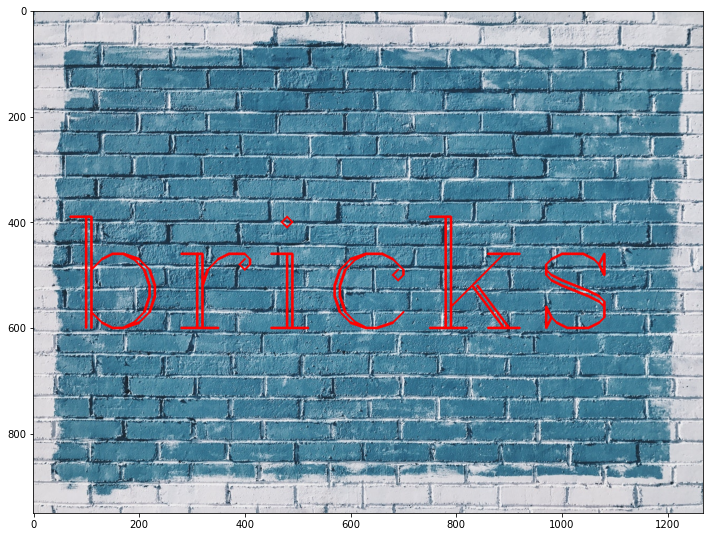

In [76]:
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(img, text = "bricks", org = (50,600), fontFace=font, fontScale=10, color = (255,0,0),thickness=4)
display_img(img) 

In [77]:
kernel = np.ones(shape=(5,5), dtype = np.float32) / 25

In [78]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

In [79]:
1/25

0.04

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


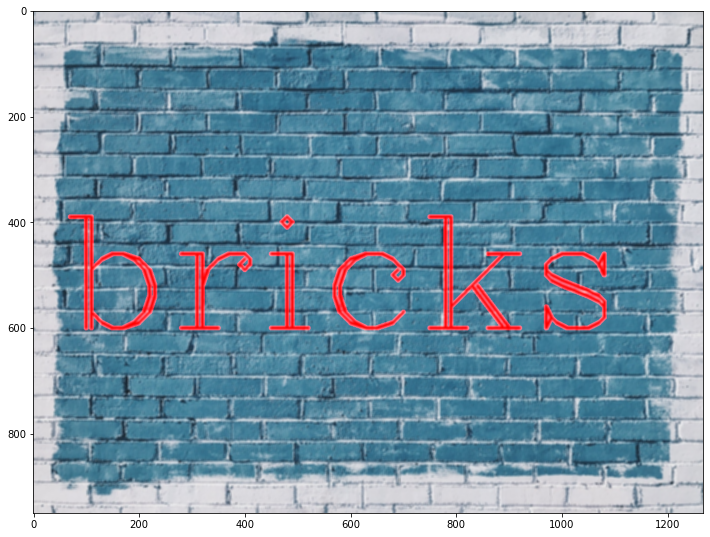

In [80]:
output = cv.filter2D(img, -1, kernel) # (img, desired depth/ ddepth,kernel)
display_img(output)

In [81]:
img = load_img()
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(img, text = "bricks", org = (50,600), fontFace=font, fontScale=10, color = (255,0,0),thickness=4)
print('reset')

reset


#### Smoothing based off averaging

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


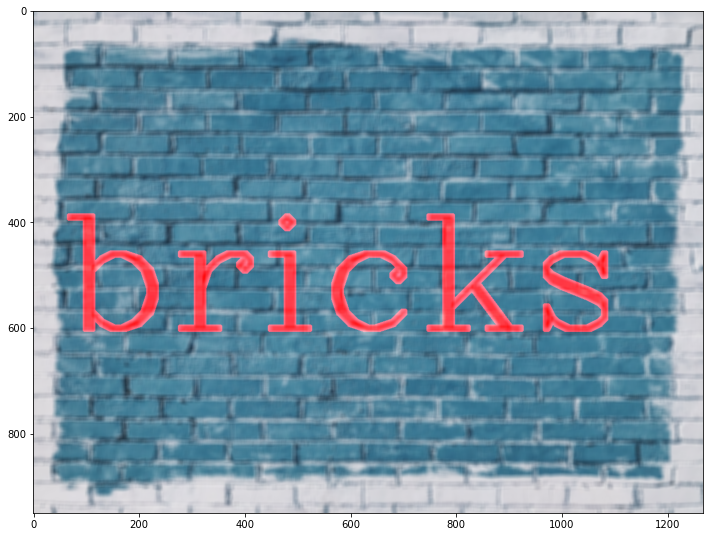

In [82]:
blurred = cv.blur(img,ksize = (10,10))
display_img(blurred)

In [83]:
# Resetting image
img = load_img()
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(img, text = "bricks", org = (50,600), fontFace=font, fontScale=10, color = (255,0,0),thickness=4)
print('reset')

reset


### GaussianBlur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


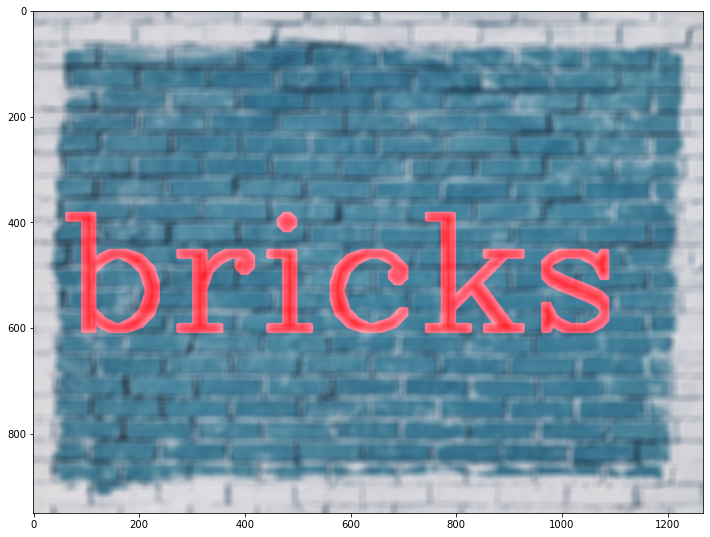

In [84]:
blurred_gauss = cv.GaussianBlur(img, ksize=(15,15), sigmaX=10)

display_img(blurred_gauss)

### Median Blur

reducing image noise

In [85]:
# Loading image
noise_img = cv.imread("../DATA/sammy_noise.jpg")
print('image loaded')

image loaded


In [89]:
import random

# adding more noise
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

noise_img = sp_noise(noise_img, 0.05)

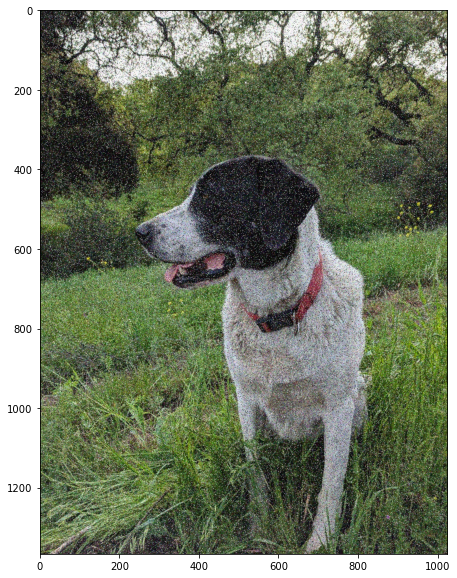

In [90]:
display_img(noise_img)

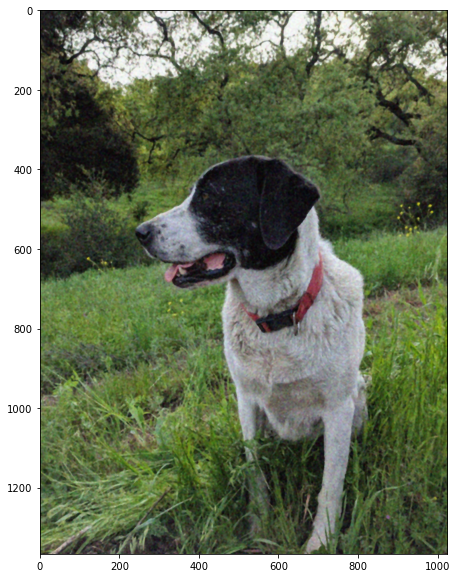

In [92]:
median_blur = cv.medianBlur(noise_img, 5)
display_img(median_blur)